In [1]:
from se2.domain.time_series import *
from se2.domain.common import *
from se2.infras.ib2 import *

(MainThread) 2021-06-07 16:05:19 INFO     __init__.py:33 初始化日志配置成功
(MainThread) 2021-06-07 16:05:19 WARNING  connection.py:106 Cluster.__init__ called with contact_points specified, but no load_balancing_policy. In the next major version, this will raise an error; please specify a load-balancing policy. (contact_points = ['172.16.0.102'], lbp = None)
(MainThread) 2021-06-07 16:05:20 INFO     policies.py:289 Using datacenter 'datacenter1' for DCAwareRoundRobinPolicy (via host '172.16.0.102:9042'); if incorrect, please specify a local_dc to the constructor, or limit contact points to local cluster nodes
(MainThread) 2021-06-07 16:05:20 INFO     client.py:194 sent startApi
(MainThread) 2021-06-07 16:05:20 INFO     client.py:88 REQUEST startApi {}
(MainThread) 2021-06-07 16:05:20 INFO     client.py:77 SENDING startApi b'\x00\x00\x00\n71\x002\x00710\x00\x00'
(ib_msg_consumer) 2021-06-07 16:05:20 ERROR    ib2.py:113 ib client error, req_id:-1, errorCode:2104, errorString:市场数据农场连接正常:hfarm
(ib

In [2]:
import pandas as pd

In [3]:
ts_repo: TimeSeriesRepo = BeanContainer.getBean(TimeSeriesRepo)



In [ ]:
start = pd.Timestamp("2021-06-02 21:30:00", tz='Asia/Shanghai')
end = pd.Timestamp("2021-06-02 22:00:00", tz='Asia/Shanghai')
codes = ["SPCE_STK_USD_SMART"]
command = HistoryDataQueryCommand(start, end, codes)

# ts:TimeSeries = ts_repo.find_one("ibTrade")
# df = ts.history_data(command, remove_duplicated=False)
# df = df[df['size']>10]
# df = df.droplevel(level=1)

# bid ask 价格变化
ts:TimeSeries = ts_repo.find_one("ibBidAsk")
ab_df = ts.history_data(command, remove_duplicated=False)
ab_df = ab_df.droplevel(level=1)
# 画图
# ax = df[['price']].plot()
s = (ab_df['ask_price'] - ab_df['bid_price'])
s.groupby(pd.Grouper(freq='1Min')).describe()['mean'].plot()

In [ ]:
# 统计价差， 大概开盘十分钟后，价差稳定在0.03左右
# 6.4 十分钟后价差稳定在0.03
# 6.3 开盘十分钟平均价差从0.55降低到了0.35
# 6.2 开盘十分钟从0.098降低到0.03，并在接下来很快降低到0.025左右
# 6.1 开盘十分钟从0.065降低到0.022,并随后稳定在0.025左右
# 5.28 开盘十分钟从0.05降低到0.04, 降低不明显，因为开盘的价差也不大
# 5.27 开盘十分钟从0.07降到0.02,并且随后稳定在0.02
# 5.26 0.063 到0.028
# 5.24 今天成交量很高，价差很低，开盘5分钟从0.03降低到0.01,并且随后稳定在0.0125

(MainThread) 2021-06-07 16:05:30 INFO     client.py:88 REQUEST reqContractDetails {'reqId': 11872336, 'contract': 140443842084976: 0,SPCE,STK,,0.0,,,SMART,,USD,,,False,,combo:}
(MainThread) 2021-06-07 16:05:30 INFO     client.py:77 SENDING reqContractDetails b'\x00\x00\x0009\x008\x0011872336\x000\x00SPCE\x00STK\x00\x000.0\x00\x00\x00SMART\x00\x00USD\x00\x00\x000\x00\x00\x00'
(MainThread) 2021-06-07 16:05:30 INFO     client.py:88 REQUEST reqHistoricalTicks {'reqId': 56197874, 'contract': 140443842196000: 388824891,SPCE,STK,,0.0,,,SMART,NYSE,USD,SPCE,SPCE,False,,combo:, 'startDateTime': '20210605 03:30:00', 'endDateTime': '', 'numberOfTicks': 1000, 'whatToShow': 'BID_ASK', 'useRth': 1, 'ignoreSize': True, 'miscOptions': None}
(MainThread) 2021-06-07 16:05:30 INFO     client.py:77 SENDING reqHistoricalTicks b'\x00\x00\x00f96\x0056197874\x00388824891\x00SPCE\x00STK\x00\x000.0\x00\x00\x00SMART\x00NYSE\x00USD\x00SPCE\x00SPCE\x000\x0020210605 03:30:00\x00\x001000\x00BID_ASK\x001\x001\x00\x00'

<AxesSubplot:xlabel='visible_time'>

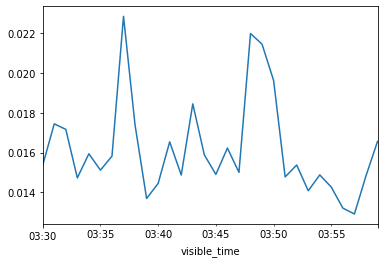

In [4]:
# 统计收盘时刻的价差
start = pd.Timestamp("2021-06-05 03:30:00", tz='Asia/Shanghai')
end = pd.Timestamp("2021-06-05 04:00:00", tz='Asia/Shanghai')
codes = ["SPCE_STK_USD_SMART"]
command = HistoryDataQueryCommand(start, end, codes)

# ts:TimeSeries = ts_repo.find_one("ibTrade")
# df = ts.history_data(command, remove_duplicated=False)
# df = df[df['size']>10]
# df = df.droplevel(level=1)

# bid ask 价格变化
ts:TimeSeries = ts_repo.find_one("ibBidAsk")
ab_df = ts.history_data(command, remove_duplicated=False)
ab_df = ab_df.droplevel(level=1)
# 画图
# ax = df[['price']].plot()
s = (ab_df['ask_price'] - ab_df['bid_price'])
s.groupby(pd.Grouper(freq='1Min')).describe()['mean'].plot()


In [ ]:
# 统计开盘时刻价格的波动率
# 可以使用高频率的bar数据来进行统计，使用振幅来作为指标
start = pd.Timestamp("2021-05-28 21:30:00", tz='Asia/Shanghai')
end = pd.Timestamp("2021-05-28 23:30:00", tz='Asia/Shanghai')
codes = ["SPCE_STK_USD_SMART"]
command = HistoryDataQueryCommand(start, end, codes)

ts:TimeSeries = ts_repo.find_one("ib10SecondBar")
ten_seconds_bar_df = ts.history_data(command, remove_duplicated=True)
ten_seconds_bar_df = ten_seconds_bar_df.droplevel(level=1)

In [ ]:
# 10s bar数据的振幅
amplitude = (ten_seconds_bar_df['high'] - ten_seconds_bar_df['low']) / ten_seconds_bar_df['open']
amplitude.plot()

In [ ]:
amplitude.groupby(pd.Grouper(freq='1Min')).describe()['mean'].plot()

In [ ]:
# 6.3号 咋22:15后振幅稳定在0.002左右
# 6.4号 开盘后很快就稳定在0.002左右
# 6.2 开盘后半小时稳定在0.001左右
# 6.1 开盘后半小时稳定在0.002,并且有持续下降的趋势
# 5.28 总体振幅都很大，到22：30后才基本稳定在0.003


In [ ]:
# 总结
# 开盘时刻价差较大（成交量很大的情况除外），但是能在十分钟左右稳定下来。 相比较而言，价格波动要
# 在更长的时间才能稳定下来， 应该避免在高价差的时候进行操作， 收盘时刻的价差总是很低的

# 策略如果选择开盘作为交易时间点，很容易会应该频繁变动的买卖价以及高